<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Image%20restoration%20and%20edge%20detection%20on%20sobel%20operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

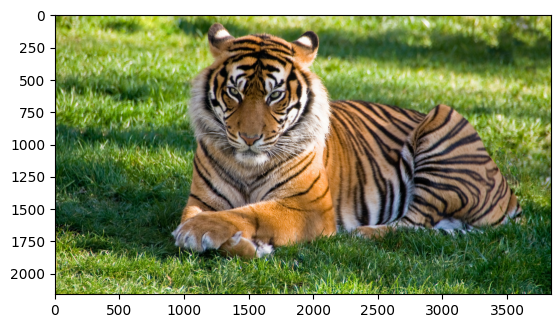

In [ ]:
import cv2
from matplotlib import pyplot as plt
img=cv2.imread("/content/tigers.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Enter Sobel kernel size (3 or 5): 5


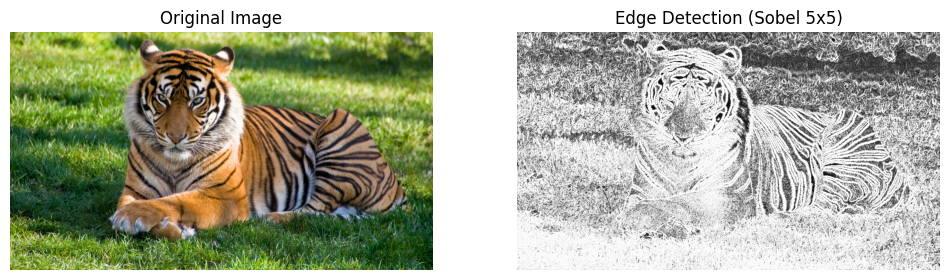

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/tigers.jpg")
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Convert to RGB and Grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Ask the user for the kernel size
kernel_size = int(input("Enter Sobel kernel size (3 or 5): ").strip())

# Define Sobel kernels based on user input
if kernel_size == 3:
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [0,  0,  0],
                        [1,  2,  1]], dtype=np.float32)

elif kernel_size == 5:
    sobel_x = np.array([[-2, -1, 0, 1, 2],
                        [-3, -2, 0, 2, 3],
                        [-4, -3, 0, 3, 4],
                        [-3, -2, 0, 2, 3],
                        [-2, -1, 0, 1, 2]], dtype=np.float32)

    sobel_y = np.array([[-2, -3, -4, -3, -2],
                        [-1, -2, -3, -2, -1],
                        [ 0,  0,  0,  0,  0],
                        [ 1,  2,  3,  2,  1],
                        [ 2,  3,  4,  3,  2]], dtype=np.float32)

else:
    raise ValueError("Invalid input! Please enter 3 or 5.")

# Apply Sobel filters using custom kernels
grad_x = cv2.filter2D(gray, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(gray, cv2.CV_64F, sobel_y)

# Compute gradient magnitude
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Convert to uint8
grad_magnitude = cv2.convertScaleAbs(grad_magnitude)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grad_magnitude, cmap='gray')
plt.title(f'Edge Detection (Sobel {kernel_size}x{kernel_size})')
plt.axis('off')

plt.show()

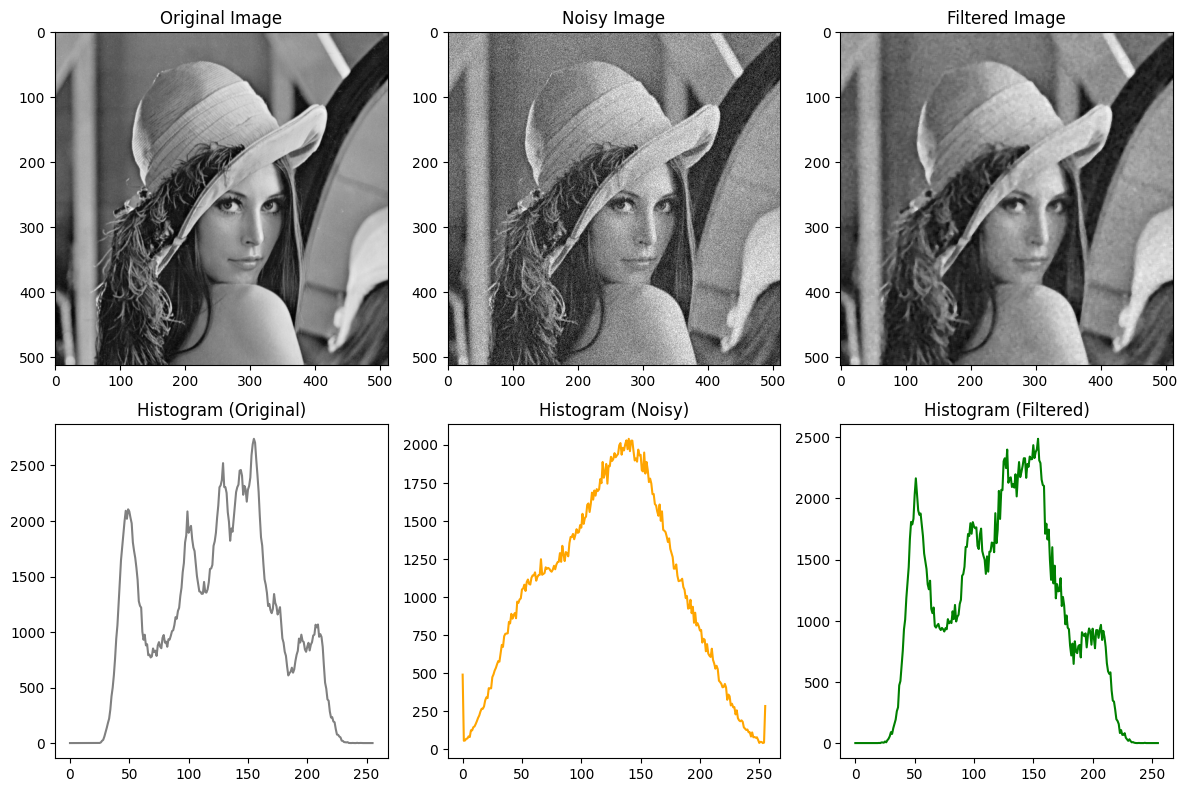

In [ ]:
# prompt: gaussian noise add and restore using median filter
#  with histogram plot

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/lenna-png-1.png")
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise
noise = np.random.normal(0, 20, gray.shape)  # Adjust standard deviation (20) as needed
noisy_img = gray + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)  # Clip values to 0-255 range

# Apply median filter
kernel_size = 5  # Adjust kernel size as needed
filtered_img = cv2.medianBlur(noisy_img, kernel_size)


# Calculate histograms
hist_gray, bins_gray = np.histogram(gray.flatten(), 256, [0, 256])
hist_noisy, bins_noisy = np.histogram(noisy_img.flatten(), 256, [0, 256])
hist_filtered, bins_filtered = np.histogram(filtered_img.flatten(), 256, [0, 256])


# Plot the images and histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

plt.subplot(2, 3, 3)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')


plt.subplot(2, 3, 4)
plt.plot(bins_gray[:-1], hist_gray, color='gray')
plt.title('Histogram (Original)')

plt.subplot(2, 3, 5)
plt.plot(bins_noisy[:-1], hist_noisy, color='orange')
plt.title('Histogram (Noisy)')

plt.subplot(2, 3, 6)
plt.plot(bins_filtered[:-1], hist_filtered, color='green')
plt.title('Histogram (Filtered)')

plt.tight_layout()
plt.show()


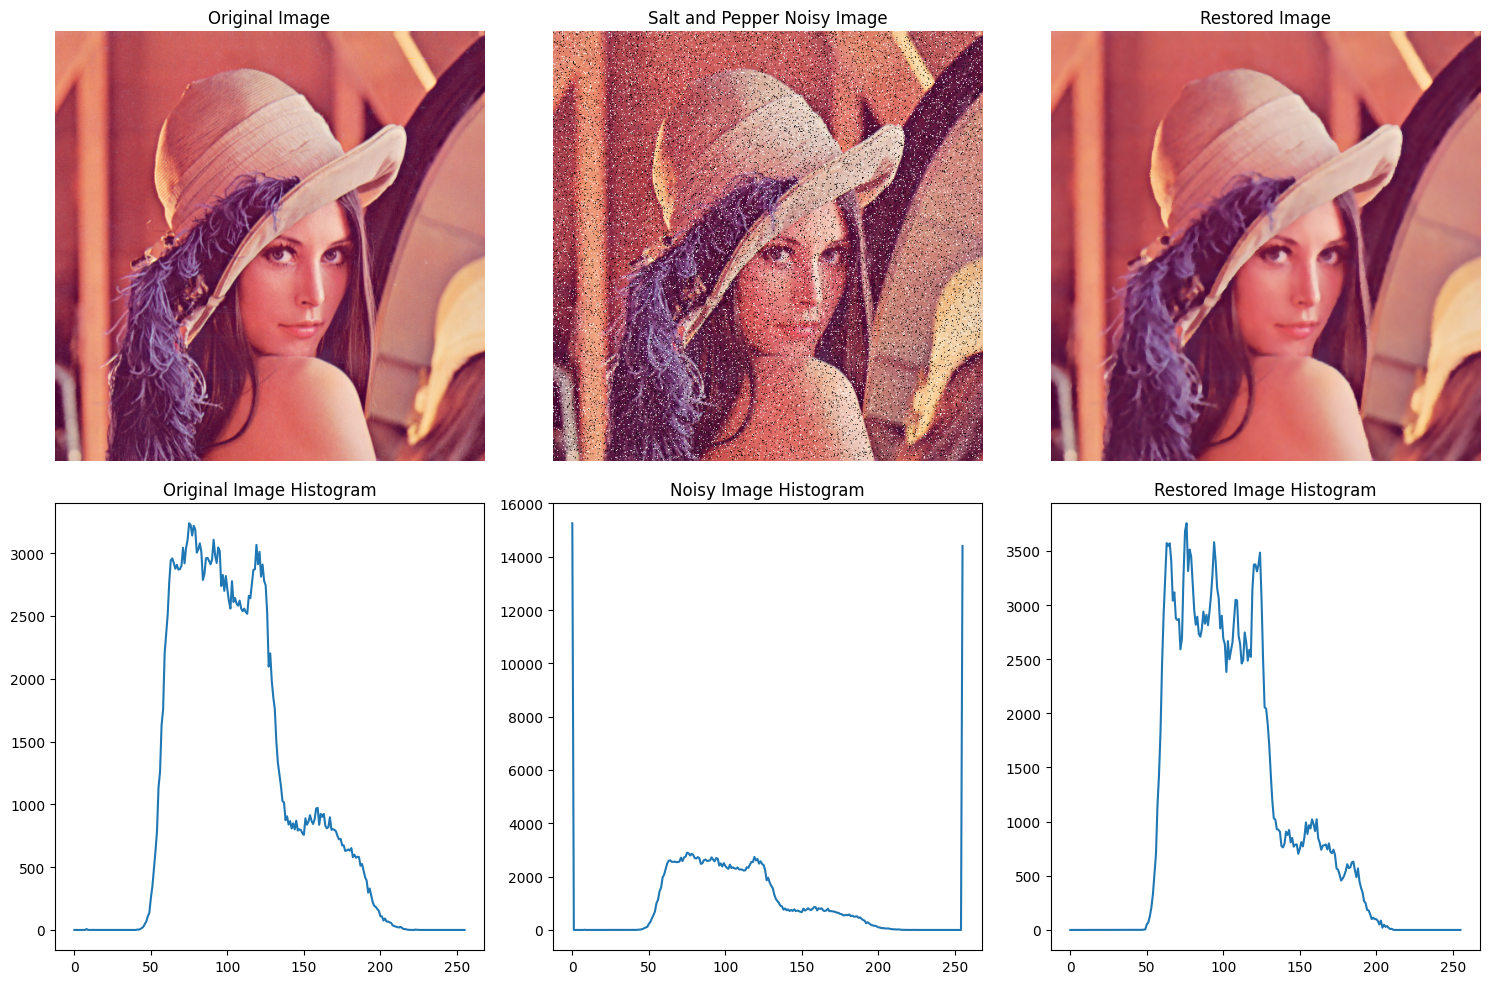

In [ ]:
# prompt: salt and pepper noise and restoration with histogram plot

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace with your image path)
img = cv2.imread("/content/lenna-png-1.png")
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add Salt and Pepper Noise
row, col, ch = img.shape
s_vs_p = 0.5
amount = 0.04
out = np.copy(img)

# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]
out[coords[0], coords[1], :] = 255

# Pepper mode
num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
out[coords[0], coords[1], :] = 0

noisy_img = out
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)


# Apply Median Filter for Restoration
restored_img = cv2.medianBlur(noisy_img, 5)  # Adjust kernel size as needed
restored_img_rgb = cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB)


# Calculate Histograms
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_noisy = cv2.calcHist([noisy_img], [0], None, [256], [0, 256])
hist_restored = cv2.calcHist([restored_img], [0], None, [256], [0, 256])


# Display Images and Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_img_rgb)
plt.title("Salt and Pepper Noisy Image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(restored_img_rgb)
plt.title("Restored Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(hist_original)
plt.title("Original Image Histogram")

plt.subplot(2, 3, 5)
plt.plot(hist_noisy)
plt.title("Noisy Image Histogram")

plt.subplot(2, 3, 6)
plt.plot(hist_restored)
plt.title("Restored Image Histogram")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


<ipython-input-29-5eafec128934>:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
<ipython-input-29-5eafec128934>:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noise_img.ravel(), 256, [0, 256])
<ipython-input-29-5eafec128934>:41: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(denoised_img.ravel(), 256, [0, 256])


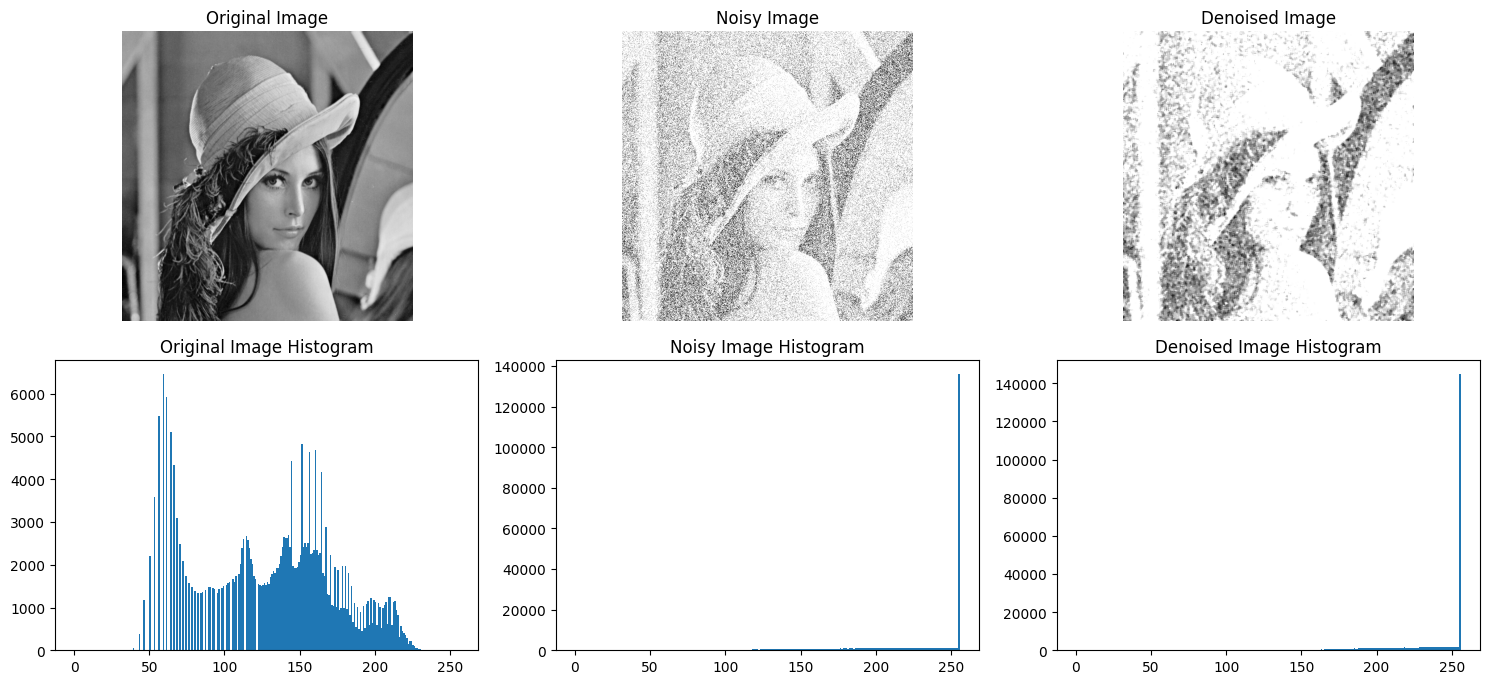

In [ ]:
def add_uniform_noise(image,min_val=0,max_val=255):
  noise=np.random.uniform(min_val,max_val,image.shape).astype(np.uint8)
  noisy_image=cv2.add(image,noise)
  noisy_image=np.clip(noisy_image,0,255).astype(np.uint8)
  return noisy_image

img=cv2.imread("/content/lenna-png-1.png",cv2.IMREAD_GRAYSCALE)
if img is None:
  raise ValueError("Error: Image not found. Check the file path.")

noise_img=add_uniform_noise(img)
denoised_img=cv2.medianBlur(noise_img,5)
plt.figure(figsize=(15,10))

# Display Images
plt.subplot(3,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(noise_img, cmap="gray")
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(3,3,3)
plt.imshow(denoised_img, cmap="gray")
plt.title("Denoised Image")
plt.axis("off")

# Display Histograms
plt.subplot(3,3,4)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Original Image Histogram")

plt.subplot(3,3,5)
plt.hist(noise_img.ravel(), 256, [0, 256])
plt.title("Noisy Image Histogram")

plt.subplot(3,3,6)
plt.hist(denoised_img.ravel(), 256, [0, 256])
plt.title("Denoised Image Histogram")

plt.tight_layout()
plt.show()


<ipython-input-41-661448175e6e>:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
<ipython-input-41-661448175e6e>:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noisy_img.ravel(), 256, [0, 256])
<ipython-input-41-661448175e6e>:65: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(restored_img.ravel(), 256, [0, 256])


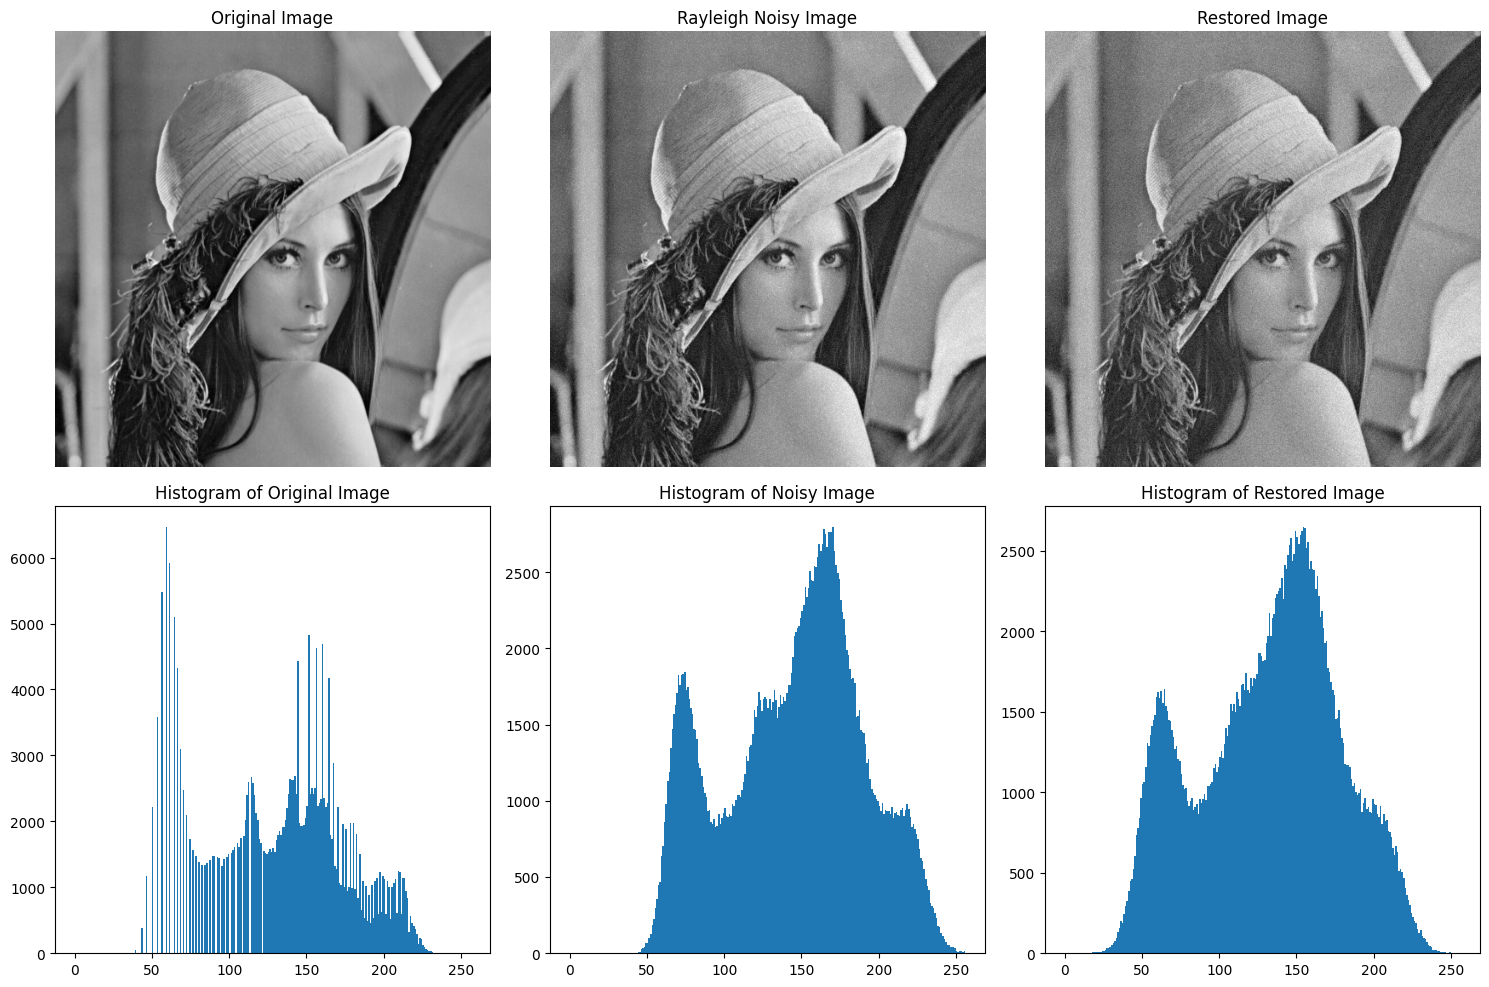

In [ ]:
# prompt: rayleigh noise  with histogram for original and noised and restored image in subplot

import cv2
import numpy as np
import matplotlib.pyplot as plt


def add_rayleigh_noise(image, scale=10):
    # Generate Rayleigh noise
    noise = np.random.rayleigh(scale, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Clip to valid range
    return noisy_image

def restore_rayleigh_noise(noisy_image, original_image, scale=10):
  # Simple restoration (subtracting the estimated noise)
  # In practice more advanced techniques are necessary
  restored_image = noisy_image - np.random.rayleigh(scale, size=noisy_image.shape)
  restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
  return restored_image

# Load the image (replace with your image path)
img = cv2.imread("/content/Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")



# Add Rayleigh noise
noisy_img = add_rayleigh_noise(img)

# Restore the image (using a placeholder method, replace with proper restoration)
restored_img = restore_rayleigh_noise(noisy_img, img)


# Display images and histograms in subplots
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")


plt.axis("off")

plt.subplot(2, 3, 4)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histogram of Original Image")

# Noisy Image
plt.subplot(2, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Rayleigh Noisy Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.hist(noisy_img.ravel(), 256, [0, 256])
plt.title("Histogram of Noisy Image")


#Restored Image
plt.subplot(2, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title("Restored Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.hist(restored_img.ravel(), 256, [0, 256])
plt.title("Histogram of Restored Image")


plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


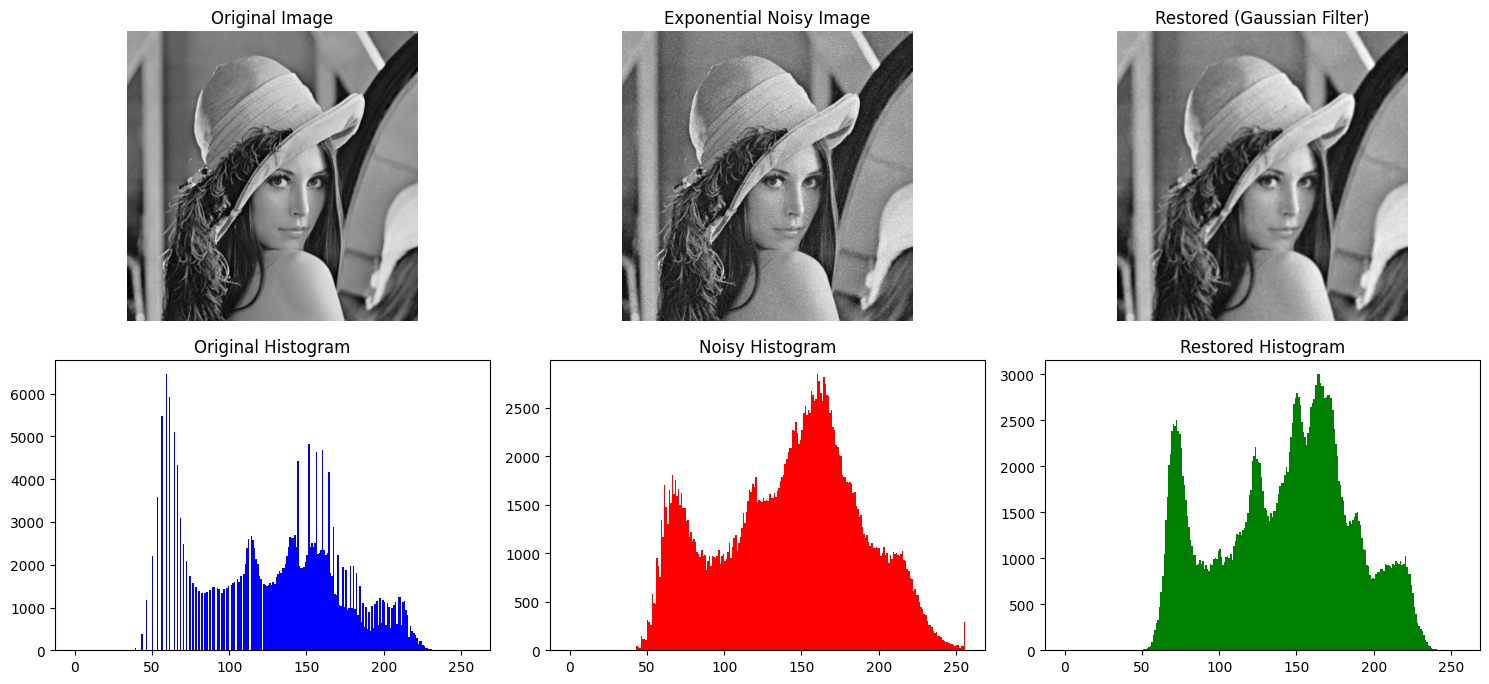

In [ ]:
# prompt: exponential noise with histogram for original and noised and restored image in subplot

import matplotlib.pyplot as plt
import cv2
from matplotlib import pyplot as plt
import numpy as np

def add_exponential_noise(image, lambda_param=0.1):
    # Generate exponential noise
    noise = np.random.exponential(scale=1/lambda_param, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Load the image and convert to grayscale
img = cv2.imread("/content/Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
if img is None:0.
    raise ValueError("Error: Image not found. Check the file path.")

# Add exponential noise
noisy_img_exponential = add_exponential_noise(img)

# Apply Gaussian Blur for noise removal
gaussian_filtered_exponential = cv2.GaussianBlur(noisy_img_exponential, (5, 5), 1.5)


# Display images and histograms in subplots
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='blue')
plt.title("Original Histogram")

# Exponential Noisy Image
plt.subplot(3, 3, 2)
plt.imshow(noisy_img_exponential, cmap='gray')
plt.title("Exponential Noisy Image")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.hist(noisy_img_exponential.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Noisy Histogram")

# Restored Image (Gaussian Filtered)
plt.subplot(3, 3, 3)
plt.imshow(gaussian_filtered_exponential, cmap='gray')
plt.title("Restored (Gaussian Filter)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.hist(gaussian_filtered_exponential.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Restored Histogram")

plt.tight_layout()
plt.show()


<ipython-input-39-b65a18585568>:48: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
<ipython-input-39-b65a18585568>:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noisy_img_gamma.ravel(), 256, [0, 256])
<ipython-input-39-b65a18585568>:56: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(restored_img_gamma.ravel(), 256, [0, 256])


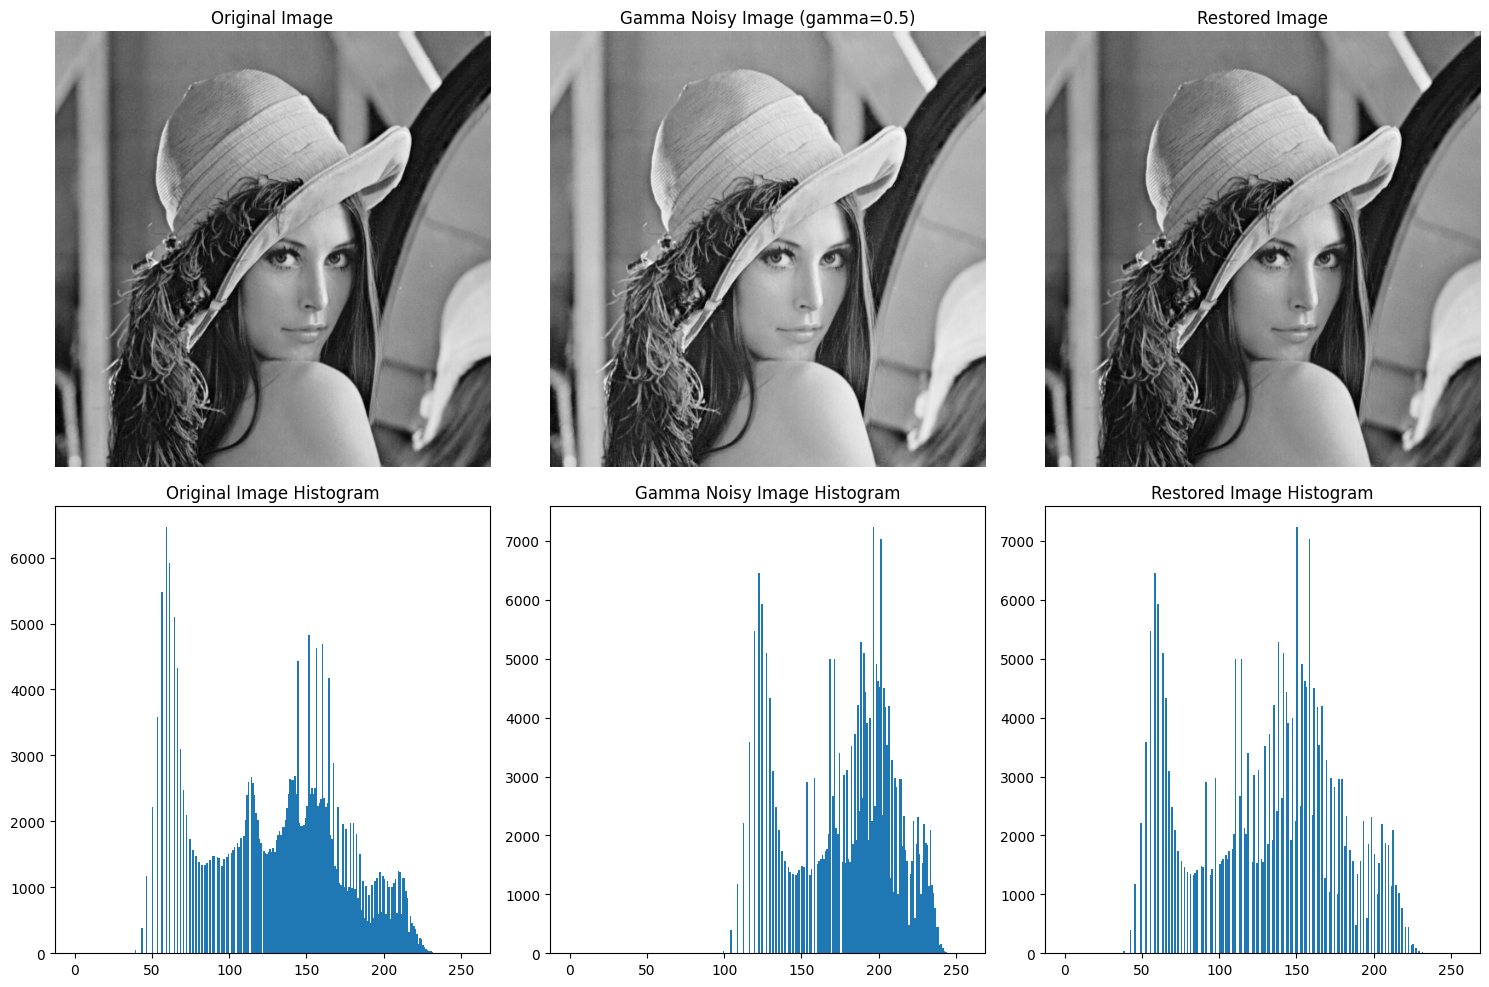

In [ ]:
# prompt: gamma noise with histogram for original and noised and restored image in subplot

import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gamma_noise(image, gamma):
    noisy_image = np.power(image / 255.0, gamma) * 255.0
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def restore_gamma_noise(noisy_image, gamma):
    restored_image = np.power(noisy_image / 255.0, 1.0 / gamma) * 255.0
    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
    return restored_image

# Load the image and convert to grayscale
img = cv2.imread("/content/Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Add Gamma noise
gamma = 0.5  # Example gamma value
noisy_img_gamma = add_gamma_noise(img, gamma)

# Restore the image
restored_img_gamma = restore_gamma_noise(noisy_img_gamma, gamma)

# Display images and histograms in subplots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(noisy_img_gamma, cmap='gray')
plt.title(f"Gamma Noisy Image (gamma={gamma})")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(restored_img_gamma, cmap='gray')
plt.title("Restored Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Original Image Histogram")

plt.subplot(2, 3, 5)
plt.hist(noisy_img_gamma.ravel(), 256, [0, 256])
plt.title("Gamma Noisy Image Histogram")

plt.subplot(2, 3, 6)
plt.hist(restored_img_gamma.ravel(), 256, [0, 256])
plt.title("Restored Image Histogram")

plt.tight_layout()
plt.show()
